<a href="https://colab.research.google.com/github/rushikeshbagul/GenAI-for-Data-Analysis-OpenAI-Assistant-API/blob/main/OpenAI%20Assistant%20API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the notebook

Set up the project environment

In [ ]:
!pip install openai==1.7.2 python-dotenv

In [ ]:
import pandas as pd
import os, time
from openai import OpenAI
from dotenv import load_dotenv
from PIL import Image
from io import BytesIO

print("Modules are imported.")

Modules are imported.


In [ ]:
load_dotenv('apikey.env.txt')

APIKEY = os.getenv('APIKEY')

In [ ]:
client = OpenAI(
    api_key = APIKEY
)
client


Create the AI Assistant

In [ ]:
data_file = client.files.create(
    file = open('product_sales_dataset.json', 'rb'),
    purpose = 'assistants'
)
data_file

FileObject(id='file-HWdzYkQpjZdDprkndDddjjtF', bytes=1456230, created_at=1730826901, filename='product_sales_dataset.json', object='file', purpose='assistants', status='processed', status_details=None)

In [ ]:
name = "Data Analyst"
description = """
You are a data analyst.
You know how to analyze data and extract insights.
You will be given a json file containing the data related to an online toy store.
And you use your data analysis and coding skills to answer the user's analytical questions about this data."""

assistant = client.beta.assistants.create(
name = name,
description = description,
model="gpt-3.5-turbo",
tools=[{"type": "code_interpreter"}],
file_ids = [data_file.id]

)

assistant

Assistant(id='asst_UskBSs9Mf6X40W1alLmIDoU2', created_at=1730826913, description="\nYou are a data analyst.\nYou know how to analyze data and extract insights.\nYou will be given a json file containing the data related to an online toy store.\nAnd you use your data analysis and coding skills to answer the user's analytical questions about this data.", file_ids=['file-HWdzYkQpjZdDprkndDddjjtF'], instructions=None, metadata={}, model='gpt-3.5-turbo', name='Data Analyst', object='assistant', tools=[ToolCodeInterpreter(type='code_interpreter')], top_p=1.0, temperature=1.0, response_format='auto')


Communicate with the AI Assistant through Threads

In [ ]:
thread = client.beta.threads.create()
thread

Thread(id='thread_nNPDBoeu6fYWjcjS7XAEyU0E', created_at=1730826922, metadata={}, object='thread')

In [ ]:
question = "Which product has the highest number of sold items?"
message = client.beta.threads.messages.create(
    thread_id = thread.id,
    role = 'user',
    content = question
)

message

ThreadMessage(id='msg_fYwyEPqLDTNkWoj1m18ToLlh', assistant_id=None, content=[MessageContentText(text=Text(annotations=[], value='Which product has the highest number of sold items?'), type='text')], created_at=1730826928, file_ids=[], metadata={}, object='thread.message', role='user', run_id=None, thread_id='thread_nNPDBoeu6fYWjcjS7XAEyU0E')

In [ ]:
run = client.beta.threads.runs.create(
    thread_id = thread.id,
    assistant_id = assistant.id
)

Retrieve results from the AI Assistant

In [ ]:
response_run = client.beta.threads.runs.retrieve(
    run_id = run.id ,
    thread_id = thread.id
)
response_run.status

'completed'

In [ ]:
messages = client.beta.threads.messages.list(
    thread_id = thread.id
)

for msg in list(messages):
  print(msg.content[0].text.value)

The product with the highest number of sold items is "Magic Sand" with a total of 998 items sold.
The data has been successfully parsed in JSON-like format. Here is the structure of the first entry:

- Date: 2018-01-01
- Product_Category: Art & Crafts
- Product_Name: Barrel O' Slime
- Product_Cost: $1.99
- Product_Price: $3.99
- Items_Sold: 281

We have identified the key "Items_Sold" that indicates the number of items sold for each product. We can now analyze this data to find the product that has the highest number of sold items. Let's proceed with this analysis.
It seems like the data is not structured in a typical CSV format. The file seems to contain data in a JSON-like format. Let's try to load the data using `json.loads()` method to properly parse the content. After that, we can analyze the data to identify the product with the highest number of sold items.
It appears that the data file is not formatted properly. The content is not structured in a typical tabular format. Let's t

Create charts with AI Assistant

In [ ]:
def send_message(assistant_id, thread_id, message_content):
      """
      Sends a message to an AI assistant,
      waits for the response run to be completed,
      and then retrieves the list of messages in the thread.
      """

      # creating message
      message = client.beta.threads.messages.create(
        thread_id = thread_id,
        role = "user",
        content = message_content
      )

      # creating request run
      request_run = client.beta.threads.runs.create(
            thread_id = thread_id,
            assistant_id = assistant_id
      )

      # wait until the response_run is completed
      while True:
            # retrieve the run
            response_run = client.beta.threads.runs.retrieve(
                  thread_id = thread_id,
                  run_id = request_run.id
            )

            print("status > "+response_run.status)

            time.sleep(1)

            if(response_run.status=="completed"):
              time.sleep(1)
              break

      messages = client.beta.threads.messages.list(
            thread_id = thread_id
      )

      return list(messages)

In [ ]:
question = "In which day of week we have highest number of sold items?"

messages = send_message(assistant.id, thread.id, question)
print(messages)

status > in_progress
status > in_progress
status > in_progress
status > in_progress
status > in_progress
status > in_progress
status > completed
[ThreadMessage(id='msg_rJ4mvOJa00GKUSSldp2jZA5n', assistant_id='asst_UskBSs9Mf6X40W1alLmIDoU2', content=[MessageContentText(text=Text(annotations=[], value='The day of the week with the highest number of sold items is Sunday, with a total of 109,296 items sold on that day.'), type='text')], created_at=1730827052, file_ids=[], metadata={}, object='thread.message', role='assistant', run_id='run_qXSTs264t3PeV6SSESddhMVS', thread_id='thread_nNPDBoeu6fYWjcjS7XAEyU0E'), ThreadMessage(id='msg_PS99xVEu6og3DK7juIoOAGNK', assistant_id='asst_UskBSs9Mf6X40W1alLmIDoU2', content=[MessageContentText(text=Text(annotations=[], value='To determine which day of the week had the highest number of sold items, we will first need to extract the day of the week from the "Date" column in the dataset. Then, we can aggregate the number of sold items for each day of the 

In [ ]:
question = "Create a histogram of the product price column?"

messages = send_message(assistant.id, thread.id, question)
answer = messages[0]
print(answer)

status > in_progress
status > in_progress
status > in_progress
status > in_progress
status > in_progress
status > in_progress
status > in_progress
status > in_progress
status > in_progress
status > completed
ThreadMessage(id='msg_K79lhZzS8X298cMF95gZoN8e', assistant_id='asst_UskBSs9Mf6X40W1alLmIDoU2', content=[MessageContentImageFile(image_file=ImageFile(file_id='file-WyQVaIZK7cEdg6pLVsxc1N6C'), type='image_file'), MessageContentText(text=Text(annotations=[], value='Here is a histogram of the distribution of product prices. Each bar represents the frequency of products within a specific price range. This visualization provides insight into how prices are distributed across the products in the dataset.'), type='text')], created_at=1730827615, file_ids=[], metadata={}, object='thread.message', role='assistant', run_id='run_ZfioDh1JtIKMxQqm7XIxZflU', thread_id='thread_nNPDBoeu6fYWjcjS7XAEyU0E')


In [ ]:
file_id = answer.content[0].image_file.file_id
print(file_id)

file-WyQVaIZK7cEdg6pLVsxc1N6C


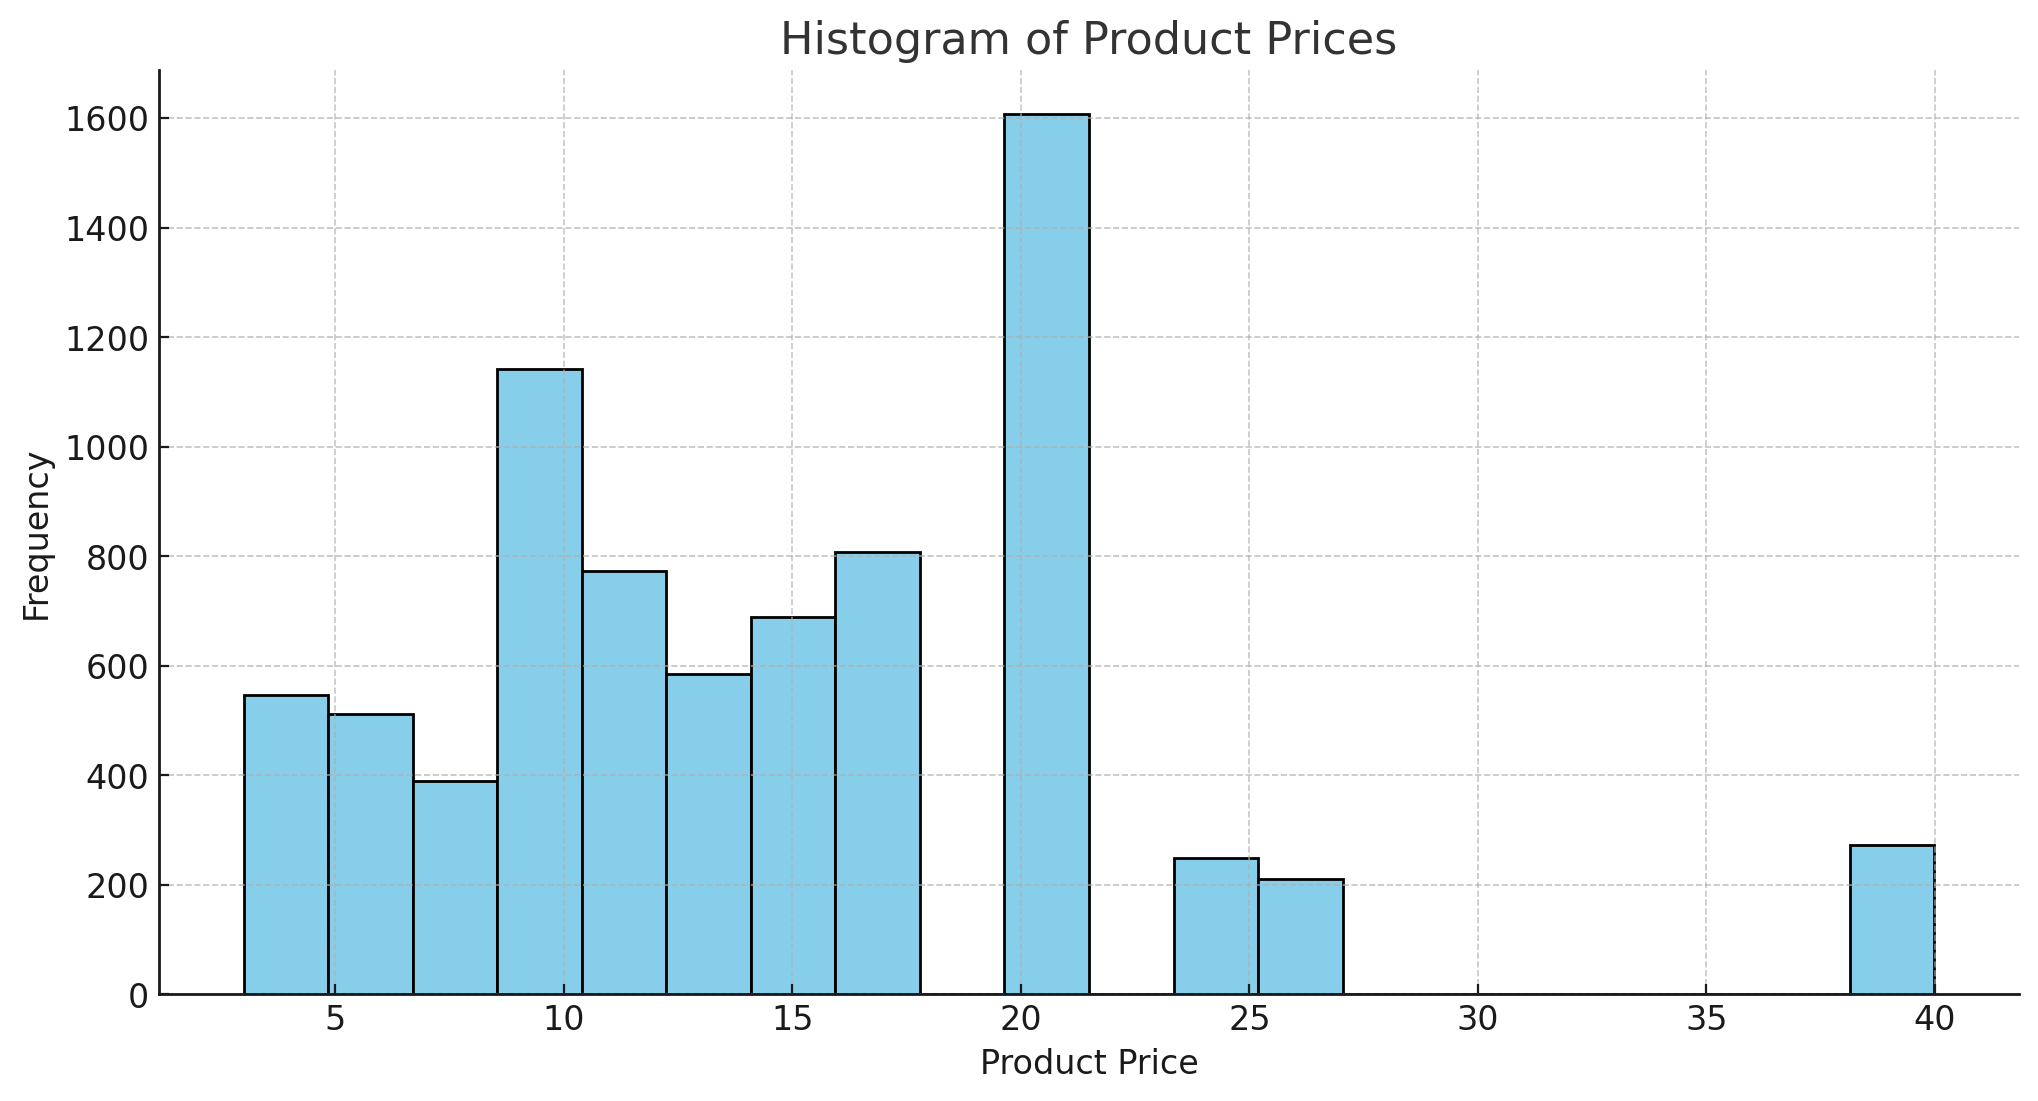

In [ ]:
image_data = client.files.content(file_id).read()
image = Image.open(BytesIO(image_data))
image

Exercise: Create a line chart of the average number of sold items per month

status > in_progress
status > in_progress
status > in_progress
status > in_progress
status > in_progress
status > in_progress
status > completed


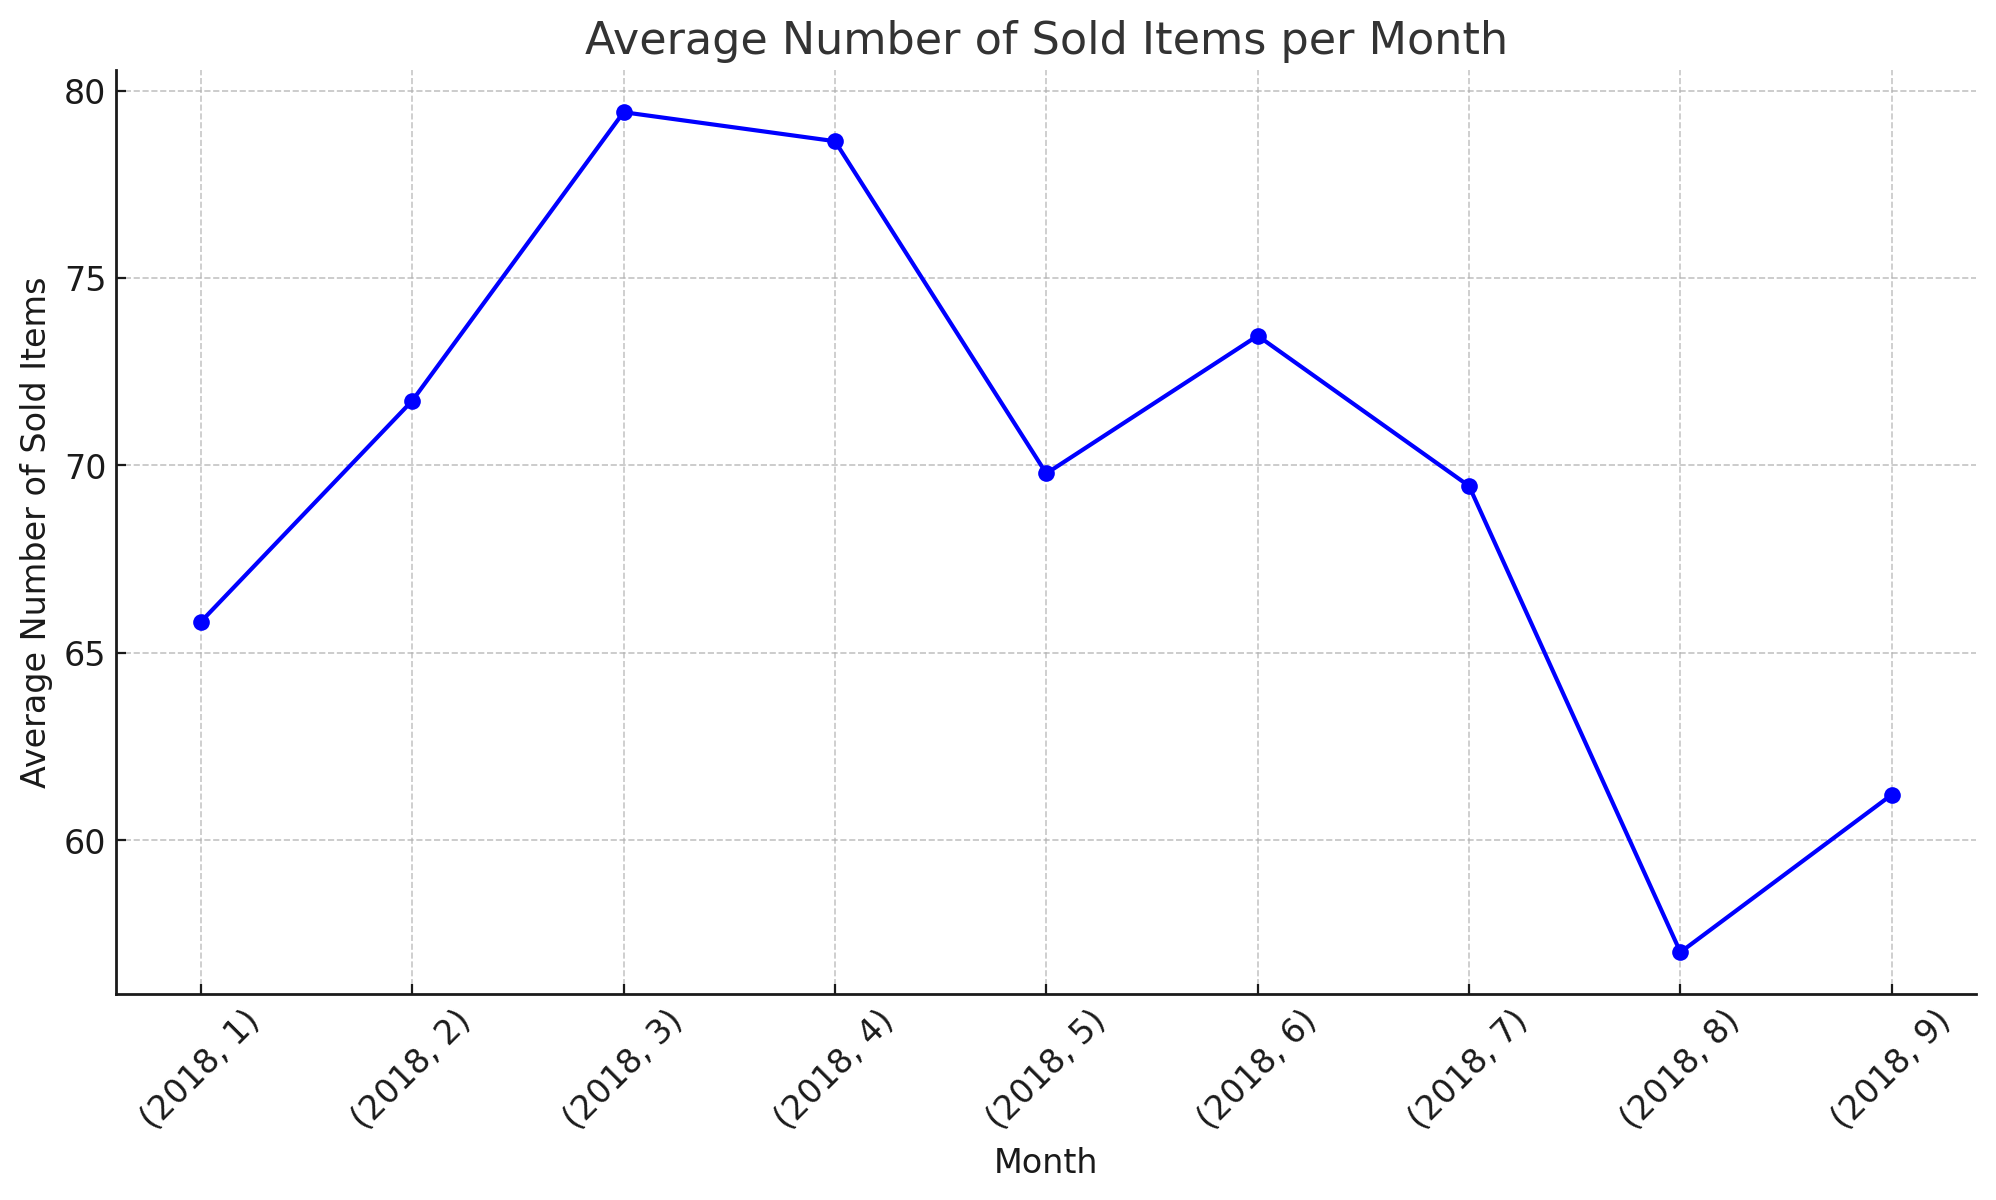

In [ ]:
question = "Create a line chart of the average number of sold items per month"

msgs = send_message(assistant.id, thread.id, question)
answer = msgs[0]
file_id = answer.content[0].image_file.file_id
image_data = client.files.content(file_id).read()
image = Image.open(BytesIO(image_data))
image